# OBJECTIVE

The aim of this dataset called Doctor Fee Prediction based on the qualifications mentioned in the data dataset. 
This dataset is valuable for analyzing and understanding various factors influencing doctores fee , 
enabling researchers and analysts to develop models thataccurately predict fee  based on relevant input features.

In [243]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy.sparse
from sklearn.model_selection import train_test_split

from sklearn.svm import  SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
RANDOM_STATE = 42
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [244]:
df = pd.read_csv("DoctorFeePrediction.csv")


In [245]:
df.head()

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
0,Dr. Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000
1,Dr. Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,500
2,Dr. Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000
3,Dr. Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae &amp; Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800
4,Dr. Aisha Ahmad,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500


In [246]:
df.tail()

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
2381,Dr. Amna Rizwan,LAHORE,"Eye Specialist, Eye Surgeon","MBBS, FCPS (VITREO-RETINA)",10.0,11,100,14,11,"Wahdat clinic, Wahdat Road, Lahore",https://www.marham.pk/doctors/lahore/eye-speci...,1000
2382,Dr. Misbah Fatima,OKARA,Pediatrician,"MBBS, FCPS (Pediatrics)",10.0,7,100,14,11,"Zayyan Kidney and Child Care Clinic, Okara, Okara",https://www.marham.pk/doctors/okara/pediatrici...,1000
2383,Dr. Muhammad Kashif,RAHIM-YAR-KHAN,Dermatologist,"MBBS, Fellow American Aesthetic Association.",10.0,103,95,15,12,"Moosa Skin &amp; Laser Clinic, punjab, Rahim Y...",https://www.marham.pk/doctors/sadiqabad/dermat...,1000
2384,Asst. Prof. Dr. Ahmed Ayyaz,SAHIWAL,Nephrologist,"MBBS, MD (Nephrology)",12.0,23,100,14,12,"Sahiwal International Hospital, Near General B...",https://www.marham.pk/doctors/sahiwal/nephrolo...,1500
2385,Dr. Rameez Aziz,LARKANA,Nephrologist,"MBBS, FCPS (Nephrology)",8.0,1,100,10,10,"ali hospital larkana, wagan road, Larkana",https://www.marham.pk/doctors/larkana/nephrolo...,800


In [247]:
for i in df.columns:
    print("<font color='blue'> **"+i+":**","</font>**<br><br>")


<font color='blue'> **Doctor Name:** </font>**<br><br>
<font color='blue'> **City:** </font>**<br><br>
<font color='blue'> **Specialization:** </font>**<br><br>
<font color='blue'> **Doctor Qualification:** </font>**<br><br>
<font color='blue'> **Experience(Years):** </font>**<br><br>
<font color='blue'> **Total_Reviews:** </font>**<br><br>
<font color='blue'> **Patient Satisfaction Rate(%age):** </font>**<br><br>
<font color='blue'> **Avg Time to Patients(mins):** </font>**<br><br>
<font color='blue'> **Wait Time(mins):** </font>**<br><br>
<font color='blue'> **Hospital Address:** </font>**<br><br>
<font color='blue'> **Doctors Link:** </font>**<br><br>
<font color='blue'> **Fee(PKR):** </font>**<br><br>



> <font color='blue'> **Doctor Name:** </font> *Doctors name*<br><br>
<font color='blue'> **City:** </font> *doctors city*<br><br>
<font color='blue'> **Specialization:** </font> *doctors specialization*<br><br>
<font color='blue'> **Doctor Qualification:** </font> *Doctors Qualifications*<br><br>
<font color='blue'> **Experience(Years):** </font> *explain the years of experience*<br><br>
<font color='blue'> **Total_Reviews:** </font> *Shows the total reviews of the doctor*<br><br>
<font color='blue'> **Patient Satisfaction Rate(%age):** </font> *the percentage of satisfaction of patient*<br><br>
<font color='blue'> **Avg Time to Patients(mins):** </font> *shows the patient average time in his session*<br><br>
<font color='blue'> **Wait Time(mins):** </font> *The time the patient waits to enter his reservation* <br><br>
<font color='blue'> **Hospital Address:** </font> *The addrsss of the hospital*<br><br>
<font color='blue'> **Doctors Link:** </font> *shows doctors link (his site)*<br><br>
<font color='blue'> **Fee(PKR):** </font> *shows the doctors fee*<br><br>

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2386 non-null   object 
 1   City                             2386 non-null   object 
 2   Specialization                   2386 non-null   object 
 3   Doctor Qualification             2386 non-null   object 
 4   Experience(Years)                2386 non-null   float64
 5   Total_Reviews                    2386 non-null   int64  
 6   Patient Satisfaction Rate(%age)  2386 non-null   int64  
 7   Avg Time to Patients(mins)       2386 non-null   int64  
 8   Wait Time(mins)                  2386 non-null   int64  
 9   Hospital Address                 2386 non-null   object 
 10  Doctors Link                     2386 non-null   object 
 11  Fee(PKR)                         2386 non-null   int64  
dtypes: float64(1), int64

In [249]:
df.describe()

,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Fee(PKR)
count,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000
mean,11.844719,92.473177,96.657586,14.092205,11.264459,1201.016764
std,8.784449,282.162526,4.962300,2.722198,5.636885,831.760021
min,1.000000,0.000000,33.000000,3.000000,0.000000,0.000000
25%,6.000000,0.000000,94.000000,14.000000,10.000000,600.000000
50%,10.000000,8.000000,98.000000,14.000000,11.000000,1000.000000
75%,14.000000,54.000000,100.000000,15.000000,11.000000,1500.000000
max,53.000000,5147.000000,100.000000,50.000000,82.000000,10000.000000


In [250]:
df.shape

(2386, 12)

In [251]:
df.dtypes

Doctor Name                         object
City                                object
Specialization                      object
Doctor Qualification                object
Experience(Years)                  float64
Total_Reviews                        int64
Patient Satisfaction Rate(%age)      int64
Avg Time to Patients(mins)           int64
Wait Time(mins)                      int64
Hospital Address                    object
Doctors Link                        object
Fee(PKR)                             int64
dtype: object

In [252]:
###number of unique values in each column
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()

for column in num:
    unique_categories_count = df[column].nunique()
    print(f'Unique categories in {column}: {unique_categories_count}')
    print (df[column].head(10).unique(), '... etc' )

print('-'*80)

for column in cat:
    unique_categories_count = df[column].nunique()
    print(f'Unique categories in {column}: {unique_categories_count}')

Unique categories in Experience(Years): 52
[ 6.  1. 11. 12. 15. 10. 33.  3.] ... etc
Unique categories in Total_Reviews: 361
[ 11   0   9  71 199  22   4] ... etc
Unique categories in Patient Satisfaction Rate(%age): 25
[100  94  96] ... etc
Unique categories in Avg Time to Patients(mins): 28
[19 14 10 18 16 15] ... etc
Unique categories in Wait Time(mins): 47
[ 6 11  0 10  2  9] ... etc
Unique categories in Fee(PKR): 48
[2000  500 1000  800 1500 2500] ... etc
--------------------------------------------------------------------------------
Unique categories in Doctor Name: 2190
Unique categories in City: 117
Unique categories in Specialization: 150
Unique categories in Doctor Qualification: 1041
Unique categories in Hospital Address: 1178
Unique categories in Doctors Link: 1606


# Cleaning the data

In [253]:
print("Fee min value",df["Fee(PKR)"].min())
print("Fee max value",df["Fee(PKR)"].max())

Fee min value 0
Fee max value 10000


In [254]:
# not possible to make the fee value is zero
df = df[df['Fee(PKR)'] > 0]
print("After filtering:", df.shape)

After filtering: (2364, 12)


In [255]:
print(df.isnull().sum())
print(df.duplicated().sum())

Doctor Name                        0
City                               0
Specialization                     0
Doctor Qualification               0
Experience(Years)                  0
Total_Reviews                      0
Patient Satisfaction Rate(%age)    0
Avg Time to Patients(mins)         0
Wait Time(mins)                    0
Hospital Address                   0
Doctors Link                       0
Fee(PKR)                           0
dtype: int64
13


In [256]:
df.reset_index(inplace=True) # fixing the indices mismatch


In [257]:
df.head()

,index,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
0,0,Dr. Umair Hafeez,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000
1,1,Dr. Haris Shakeel,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,500
2,2,Dr. Iqra Rehman,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000
3,3,Dr. Erum Memon,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae &amp; Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800
4,4,Dr. Aisha Ahmad,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500


In [258]:
# Costing Features
df=df.drop(['Doctor Name'],axis=1)
df=df.drop(['index'],axis=1)

In [259]:
df.head()

,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
0,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000
1,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,500
2,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000
3,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae &amp; Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800
4,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500


# Univariate Analysis

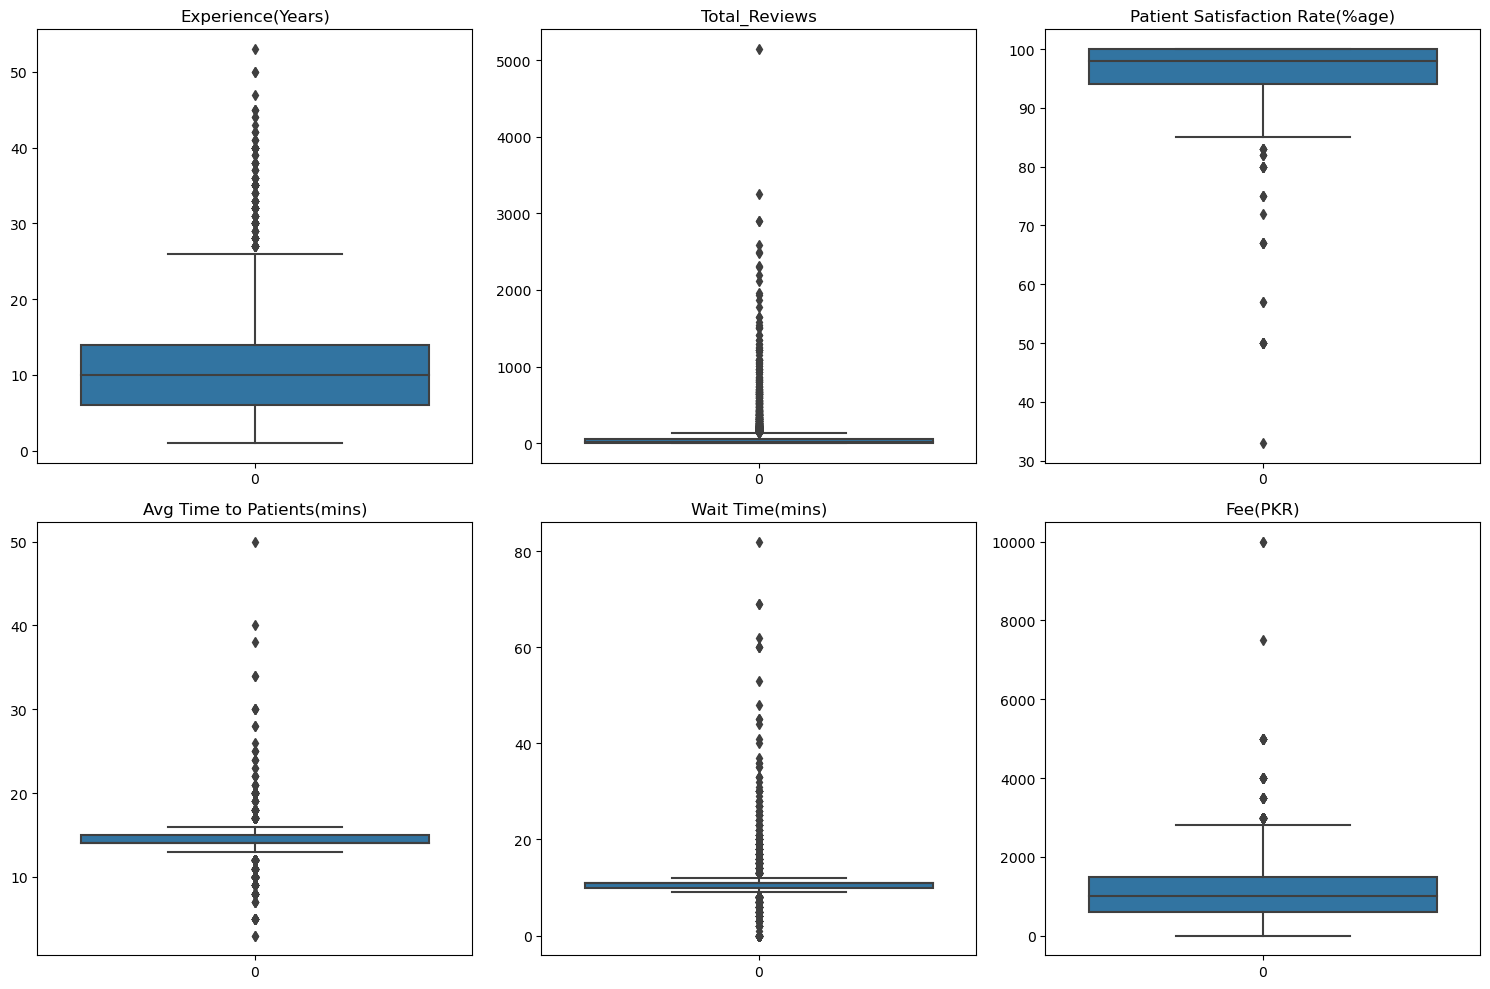

In [260]:
#Numerical columns for which I want to create boxplots for
num_cols = ['Experience(Years)','Total_Reviews','Patient Satisfaction Rate(%age)',
            'Avg Time to Patients(mins)','Wait Time(mins)','Fee(PKR)']

#Calculate number of rows needed for subplots
n = len(num_cols)
n_rows = n // 3
n_rows += n % 3

#Create subplots
fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows*5))

#Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[n:]:
    fig.delaxes(ax)

#Plot each column in a separate subplot
for i, col in enumerate(num_cols):
    sns.boxplot(df[col], ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

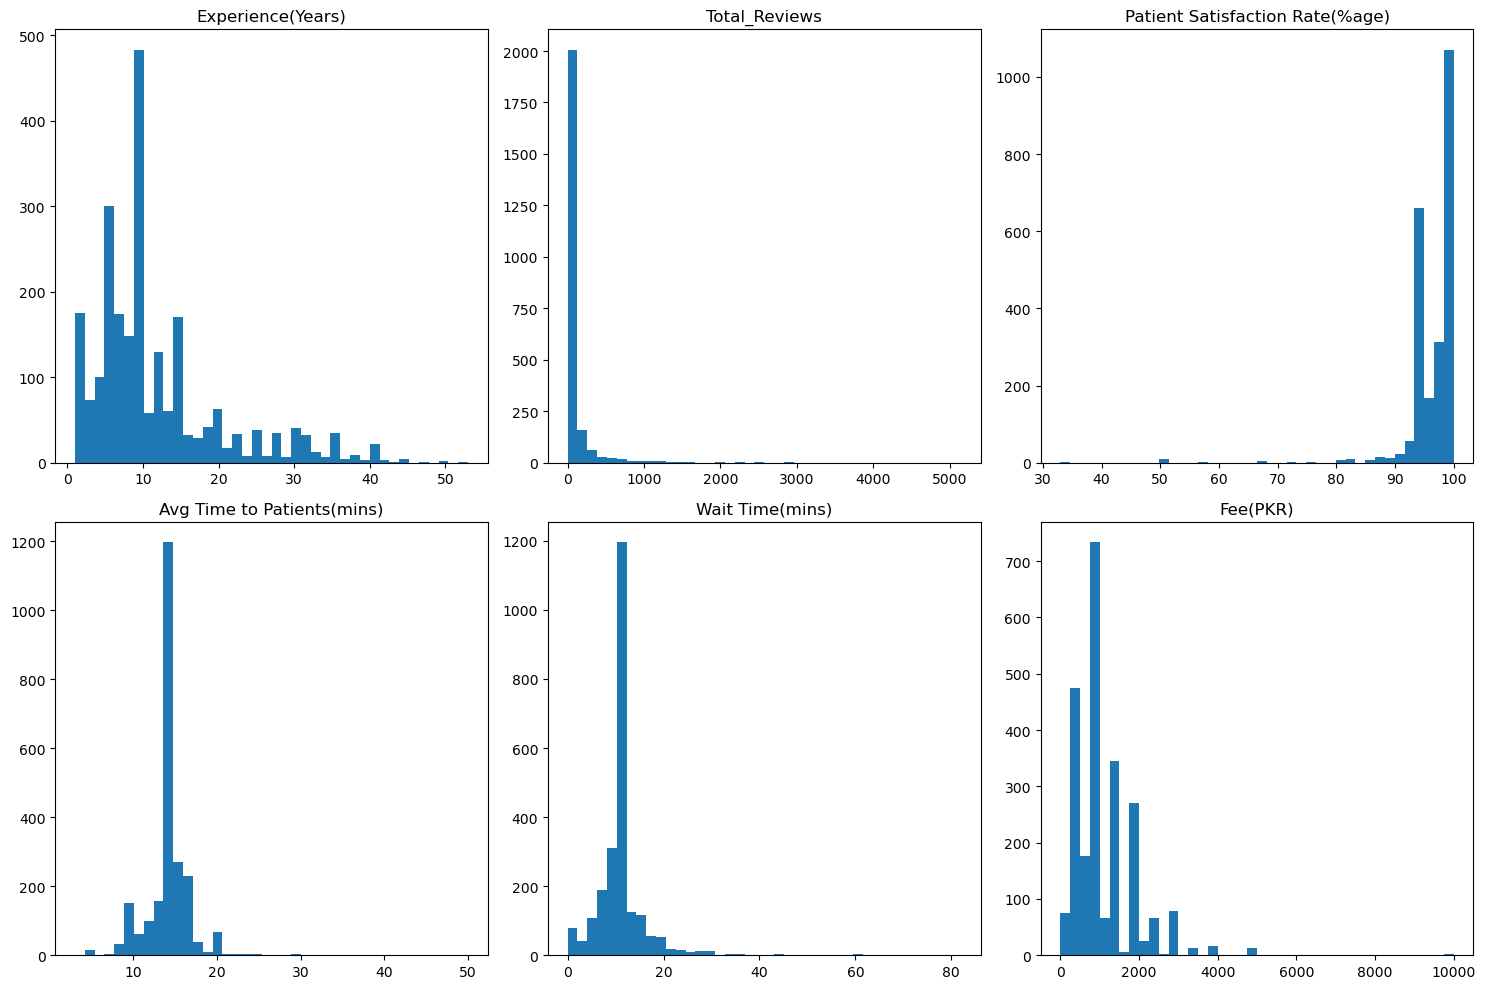

In [261]:
# Numerical columns for which I want to create boxplots for
num_cols = ['Experience(Years)','Total_Reviews','Patient Satisfaction Rate(%age)',
            'Avg Time to Patients(mins)','Wait Time(mins)','Fee(PKR)']

# Calculate number of rows needed for subplots
n = len(num_cols)
n_rows = n // 3
n_rows += n % 3

# Create subplots
fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows*5))

# Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[n:]:
    fig.delaxes(ax)

# Plot each column in a separate subplot
for i, col in enumerate(num_cols):
    axs[i].hist(df[col], bins=40)  # Adjust the number of bins as needed
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

##### Most of the data is skedwed

## Bivariate Analysis

In [262]:
df.columns


Index(['City', 'Specialization', 'Doctor Qualification', 'Experience(Years)',
       'Total_Reviews', 'Patient Satisfaction Rate(%age)',
       'Avg Time to Patients(mins)', 'Wait Time(mins)', 'Hospital Address',
       'Doctors Link', 'Fee(PKR)'],
      dtype='object')

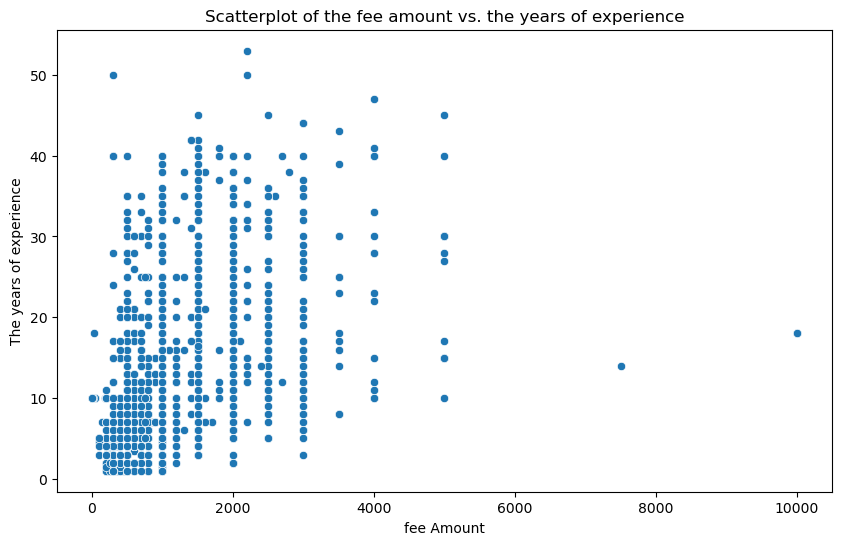

In [263]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Fee(PKR)", y="Experience(Years)")
plt.title("Scatterplot of the fee amount vs. the years of experience")
plt.xlabel("fee Amount")
plt.ylabel("The years of experience")
plt.show()

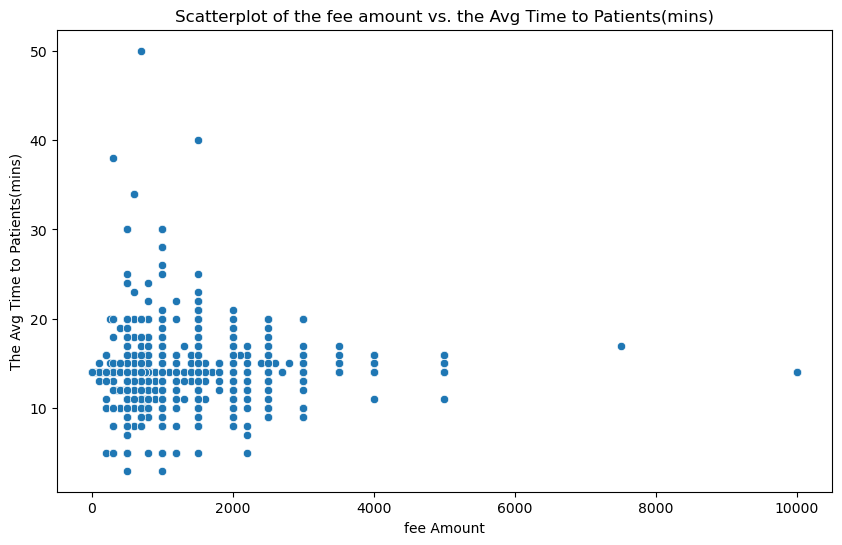

In [264]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Fee(PKR)", y="Avg Time to Patients(mins)")
plt.title("Scatterplot of the fee amount vs. the Avg Time to Patients(mins)")
plt.xlabel("fee Amount")
plt.ylabel("The Avg Time to Patients(mins)")
plt.show()

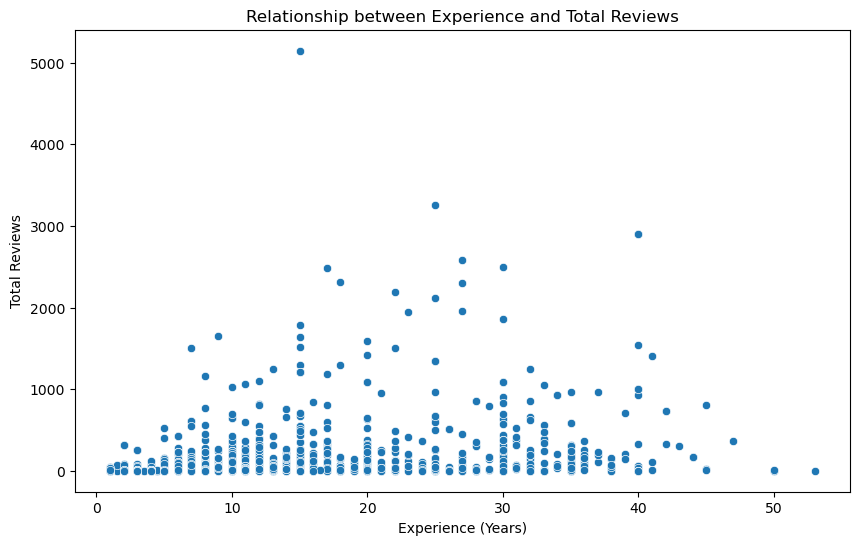

In [265]:
# Scatter plot: Experience vs Total_Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Experience(Years)', y='Total_Reviews')
plt.title('Relationship between Experience and Total Reviews')
plt.xlabel('Experience (Years)')
plt.ylabel('Total Reviews')
plt.show()

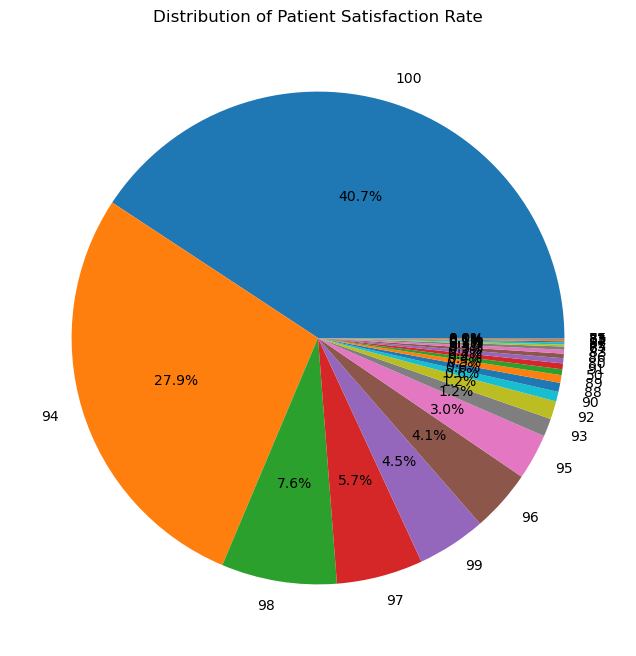

In [266]:
# Pie chart: Distribution of Patient Satisfaction Rate
plt.figure(figsize=(8, 8))
df['Patient Satisfaction Rate(%age)'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Patient Satisfaction Rate')
plt.ylabel('')
plt.show()

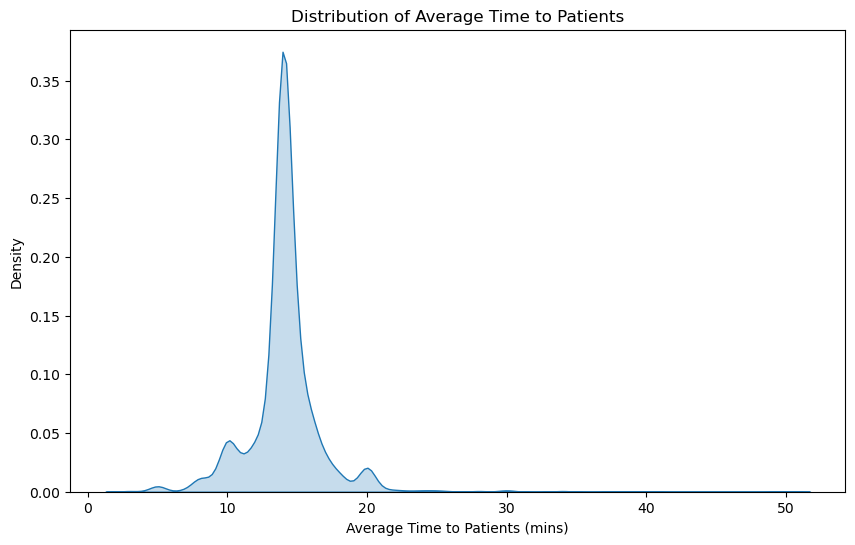

In [267]:
# Distribution plot (KDE plot): Avg Time to Patients
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Avg Time to Patients(mins)', fill=True)
plt.title('Distribution of Average Time to Patients')
plt.xlabel('Average Time to Patients (mins)')
plt.ylabel('Density')
plt.show()

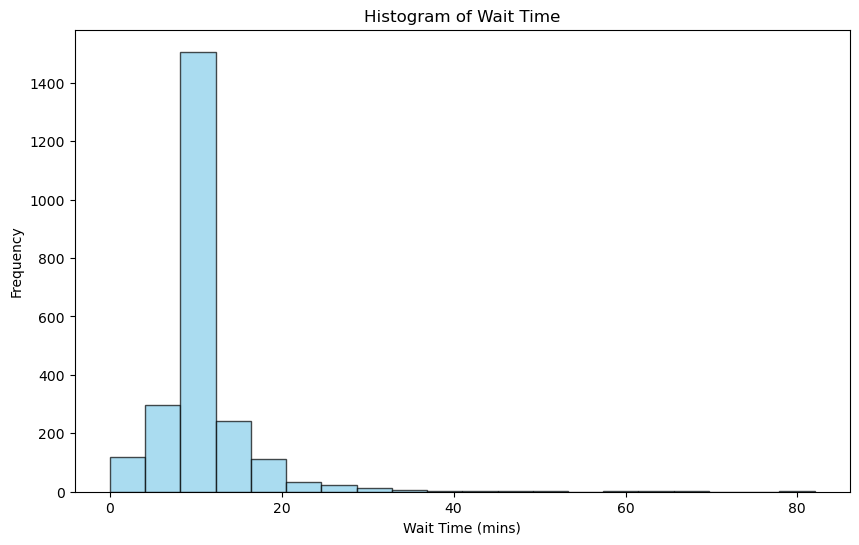

In [268]:
# Histogram: Wait Time
plt.figure(figsize=(10, 6))
plt.hist(df['Wait Time(mins)'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Wait Time')
plt.xlabel('Wait Time (mins)')
plt.ylabel('Frequency')
plt.show()

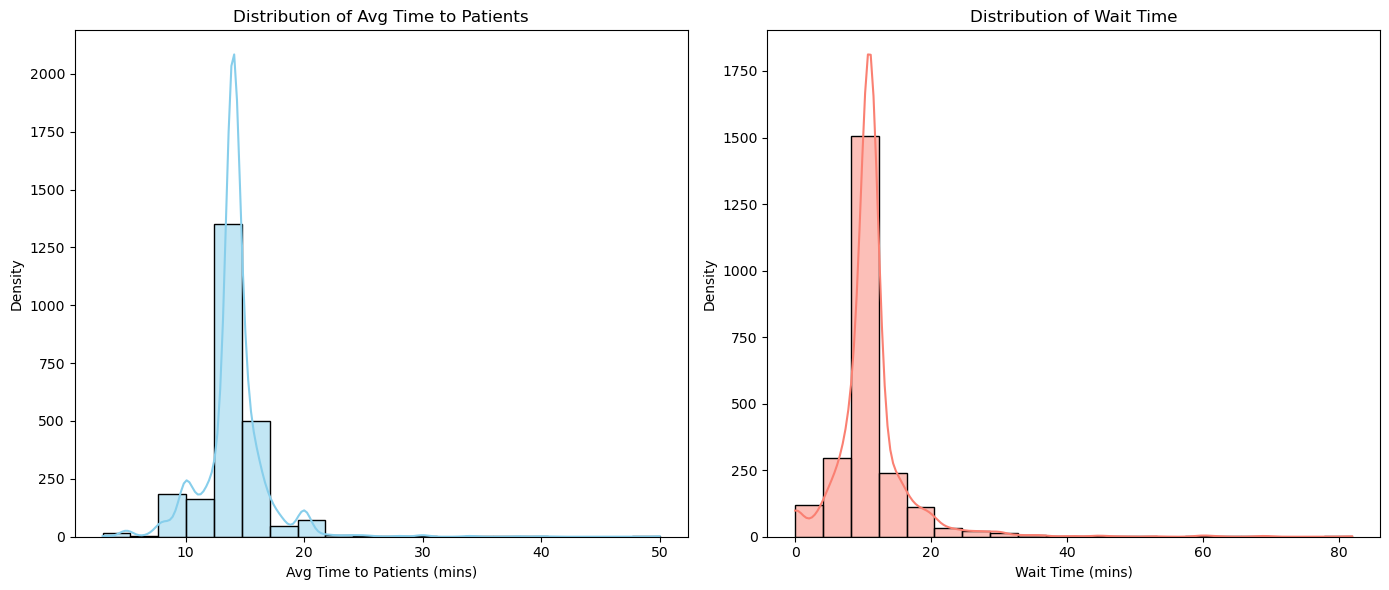

In [269]:
# Subplot: Distribution of Avg Time to Patients and Wait Time
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Avg Time to Patients(mins)'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Avg Time to Patients')
plt.xlabel('Avg Time to Patients (mins)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.histplot(df['Wait Time(mins)'], kde=True, color='salmon', bins=20)
plt.title('Distribution of Wait Time')
plt.xlabel('Wait Time (mins)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

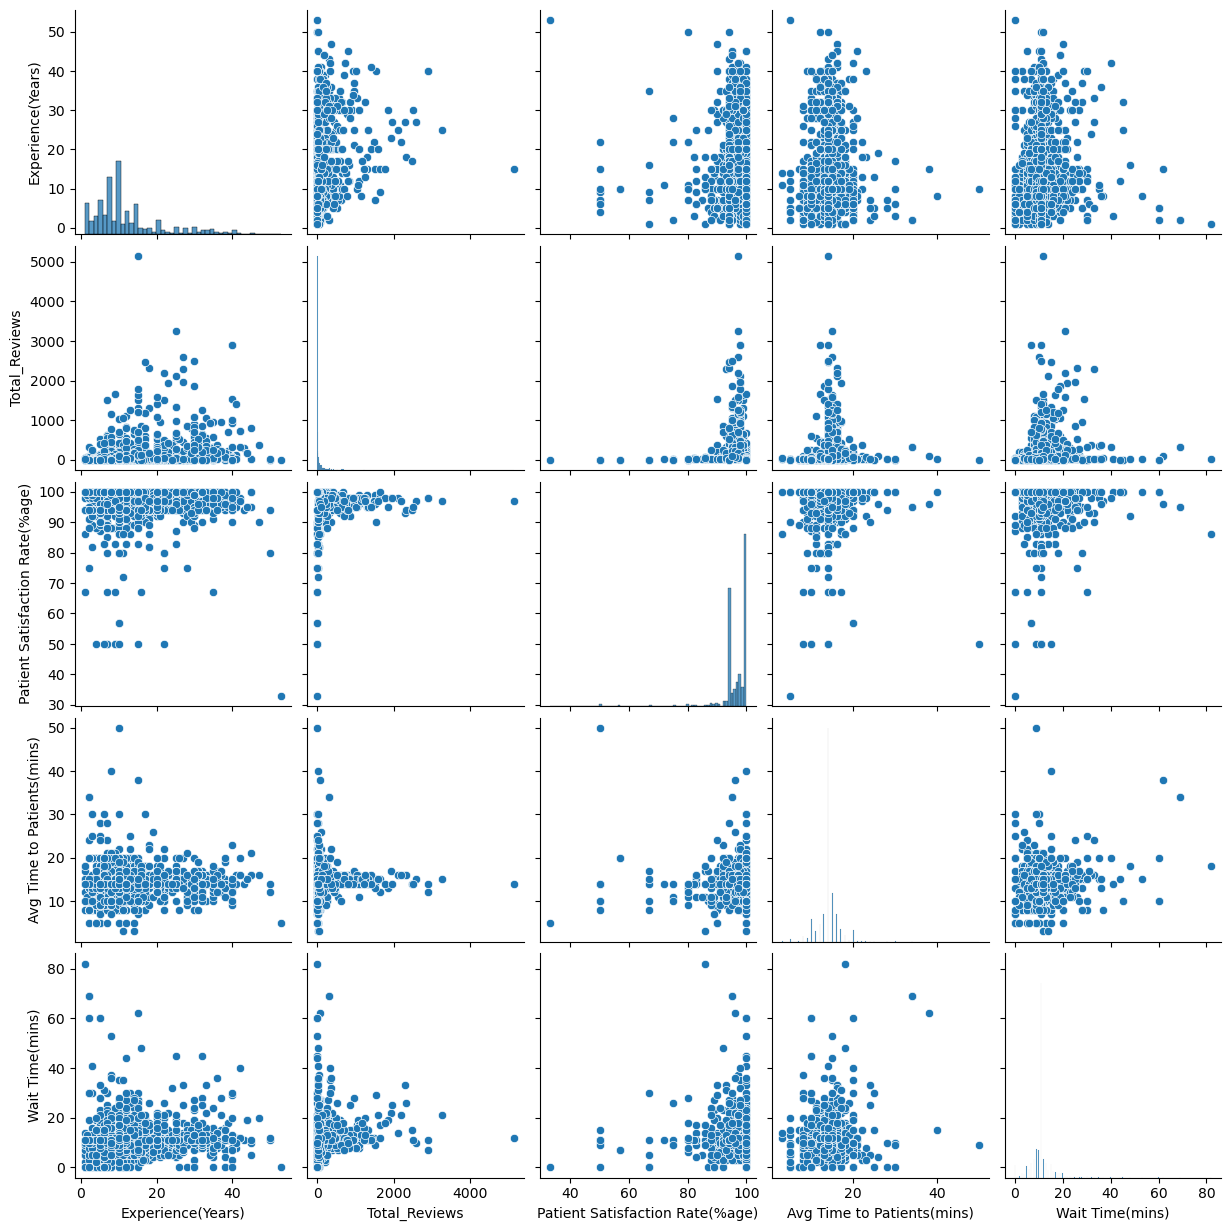

In [270]:
# Pairplot: Visualize pairwise relationships and distributions
sns.pairplot(df[['Experience(Years)', 'Total_Reviews', 'Patient Satisfaction Rate(%age)', 
                 'Avg Time to Patients(mins)', 'Wait Time(mins)']])
plt.show()

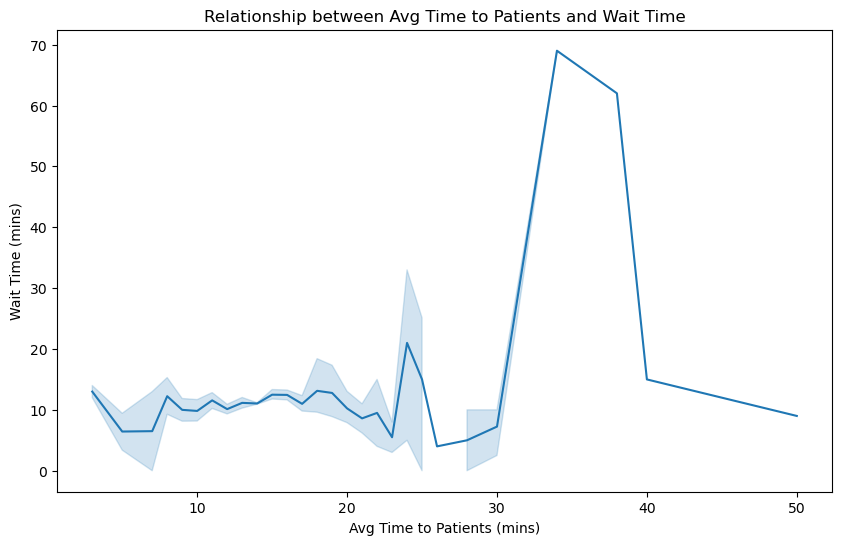

In [271]:
# Line plot: Relationship between Avg Time to Patients and Wait Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Avg Time to Patients(mins)', y='Wait Time(mins)')
plt.title('Relationship between Avg Time to Patients and Wait Time')
plt.xlabel('Avg Time to Patients (mins)')
plt.ylabel('Wait Time (mins)')
plt.show()

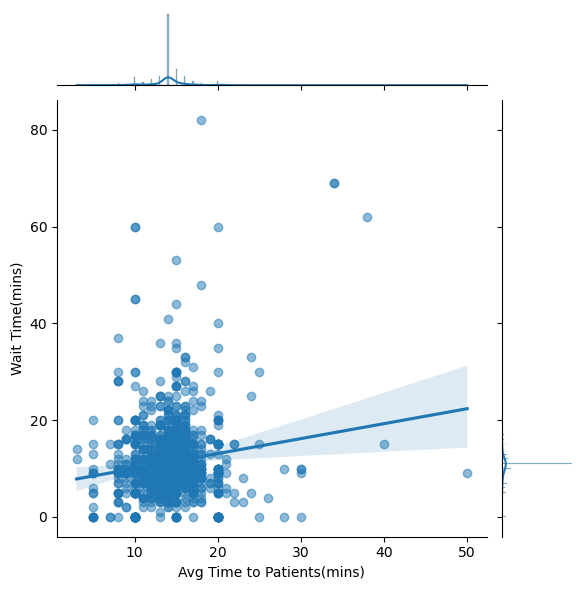

In [272]:
# Jointplot: Explore the relationship between Avg Time to Patients and Wait Time
sns.jointplot(data=df, x='Avg Time to Patients(mins)', y='Wait Time(mins)', kind='reg', scatter_kws={'alpha':0.5})
plt.show()

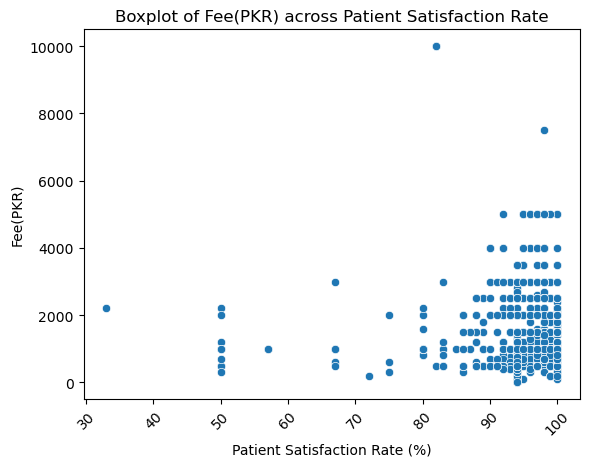

In [273]:
# Boxplot: Examine the distribution of Fee(PKR) across different levels of Patient Satisfaction Rate
sns.scatterplot(data=df, x='Patient Satisfaction Rate(%age)', y='Fee(PKR)')
plt.title('Boxplot of Fee(PKR) across Patient Satisfaction Rate')
plt.xlabel('Patient Satisfaction Rate (%)')
plt.ylabel('Fee(PKR)')
plt.xticks(rotation=45)
plt.show()

In [274]:
df.head()

,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
0,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,"Central Hospital, Jinnah Colony, Gujranwala",https://www.marham.pk/doctors/gujranwala/ent-s...,2000
1,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Address Available,No Link Available,500
2,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,"Rehman Clinic, tandoadam naka, Mirpur Khas",https://www.marham.pk/doctors/mirpur-khas/gene...,1000
3,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae &amp; Obstetrics)",11.0,71,96,18,10,"Mehmood Hospital, Qasimabad, Hyderabad",https://www.marham.pk/doctors/hyderabad/gyneco...,800
4,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,"Skinnovation, Johar Town, Lahore",https://www.marham.pk/doctors/lahore/dermatolo...,1500


In [275]:
first_split = df['Hospital Address'].str.split(',', expand=True)
second_split = first_split[0].str.split(';', expand=True)
new_column_zero = second_split.iloc[:, 0]
df_concatenated = pd.concat([df, new_column_zero], axis=1)
df = df_concatenated.rename(columns={0: 'Hospital Name'})
df.drop('Hospital Address', axis=1, inplace=True)

In [276]:
df.head()

,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Doctors Link,Fee(PKR),Hospital Name
0,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,https://www.marham.pk/doctors/gujranwala/ent-s...,2000,Central Hospital
1,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,No Link Available,500,No Address Available
2,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,https://www.marham.pk/doctors/mirpur-khas/gene...,1000,Rehman Clinic
3,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae &amp; Obstetrics)",11.0,71,96,18,10,https://www.marham.pk/doctors/hyderabad/gyneco...,800,Mehmood Hospital
4,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,https://www.marham.pk/doctors/lahore/dermatolo...,1500,Skinnovation


In [277]:
df.shape

(2364, 11)

In [278]:
def encode_link(link):
    if link != 'No Link Available':
        return 1
    else:
        return 0

# Apply the function to encode the 'Doctors Link' column
df['Doctors Link'] = df['Doctors Link'].apply(lambda x: encode_link(x))

# Now 'Doctors Link' column contains 1 if a link is available, 0 otherwise


In [279]:
df.head()

,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Doctors Link,Fee(PKR),Hospital Name
0,GUJRANWALA,Ent Specialist,"MBBS , FCPS ( Otorhinolaryngologic ENT )",6.0,11,100,19,6,1,2000,Central Hospital
1,RAJAN-PUR,General Physician,MBBS,1.0,0,94,14,11,0,500,No Address Available
2,MIRPUR-KHAS,General Physician,"MBBS, RMP, CFP (USA), Certified in Covid 19 +",6.0,9,100,10,0,1,1000,Rehman Clinic
3,HYDERABAD,Gynecologist,"MBBS, FCPS (Gynae &amp; Obstetrics)",11.0,71,96,18,10,1,800,Mehmood Hospital
4,LAHORE,Dermatologist,"MBBS, FCPS (Dermatology), Certified (Aesthetic...",12.0,199,100,16,2,1,1500,Skinnovation


In [280]:
qualifications = {'FCPS': 0, 'FRCS':0, 'M.S':0, 'MCPS' : 0, 'professor':0, 'DTCD':0, 'MS':0, 'FACP':0, 'FACS':0}
for i in range(df.shape[0]):
    qualifications_ = df.iloc[i]['Doctor Qualification']
    qualifications_of_one_doc =  qualifications_.split(',')
    for qualification in qualifications_of_one_doc:
        if qualification.strip(' ').startswith('FCPS'):
            qualifications['FCPS']+=1
        elif qualification.strip(' ').startswith('FRCS'):
            qualifications['FRCS']+=1
        elif qualification.strip(' ').startswith('M.S'):
            qualifications['M.S']+=1
        elif qualification.strip(' ').startswith('DTCD'):
            qualifications['DTCD']+=1
        elif qualification.strip(' ').startswith('MCPS'):
            qualifications['MCPS']+=1
        elif qualification.strip(' ').startswith('MS') or qualification.strip(' ').startswith('M.S'):
            qualifications['MS']+=1
        elif qualification.strip(' ').startswith('FACP'):
            qualifications['FACP']+=1
        elif qualification.strip(' ').startswith('FACS'):
            qualifications['FACS']+=1
        elif qualification.lower().find('professor') != -1: 
            qualifications['professor']+=1
        elif qualifications.get(qualification.strip(' ')) == None:
            qualifications[qualification.strip(' ')] = 1
        else:
            qualifications[qualification.strip(' ')]+=1
qualifications


{'FCPS': 1342,
 'FRCS': 75,
 'M.S': 4,
 'MCPS': 304,
 'professor': 3,
 'DTCD': 24,
 'MS': 110,
 'FACP': 14,
 'FACS': 19,
 'MBBS': 2209,
 'RMP': 20,
 'CFP (USA)': 1,
 'Certified in Covid 19 +': 1,
 'Certified (Aesthetic Medicine)': 1,
 'Master Of Surgery (Urology)': 2,
 'Training Geriatric Medicine UK': 1,
 'CHPE': 2,
 'MRCOG': 9,
 'General Physician': 1,
 'Aesthetic Physician': 1,
 'and MBBS': 1,
 'Diploma in Child Health (DCH)': 5,
 'ATLS': 2,
 'Certified Dermatologist': 3,
 'MD': 78,
 'Fellow (European Board Urology)': 2,
 'MRCS': 22,
 'Fellow EBOT (European Board of Orthopedic &amp; Traumatology)': 2,
 'Diploma in Pediatrics': 1,
 'Fellowship in Pediatrics': 1,
 'Member of College of Physicians and Surgeons Pakistan': 1,
 'FICS': 6,
 'FAAOS': 1,
 'Diplomate American Board of Orthopaedic Surgery': 1,
 'Diploma in Child Health': 4,
 'Master of Public Health': 1,
 'Diplomate Of American Board Of Neurology': 1,
 'MD Nephrology': 4,
 'Fellowship in Aesthetic Medicine': 1,
 'Diploma IVF a

# _____________________________________________________________________________________________________________________
MBBS : Bachelor of Medicine, Bachelor of Surgery

FCPS : Fellow of College of Physicians and Surgeons 

MCPS : Membership of the College of Physicians and Surgeons

MS   : Master of Surgery

MD   : Doctor of Medicine 

FRCS : Fellowship of the Royal Colleges of Surgeons

difference between FCPS & MCPS

https://study-fcps.com/fcps-and-mcps-the-key-differences-between-the-two-fellowship-programs-of-cpsp/#:~:text=MCPS%20qualified%20doctors%20can%20work,is%20completed%20in%202%20years.


according to this source, doctors with FCPS are paid more than doctors with MCPS.
this'll be verified later
# ___________________________________________________________________________________________-

In [281]:
sorted_freq = sorted(qualifications.items(), key=lambda item: item[1], reverse=True)
print(sorted_freq) 

[('MBBS', 2209), ('FCPS', 1342), ('MCPS', 304), ('MS', 110), ('MD', 78), ('FRCS', 75), ('DCH', 28), ('', 26), ('DTCD', 24), ('MRCS', 22), ('RMP', 20), ('MRCP', 20), ('FACS', 19), ('FACP', 14), ('MPH', 13), ('DOMS', 11), ('MRCOG', 9), ('MRCP (UK)', 9), ('PGPN', 8), ('DLO', 8), ('Diploma In Dermatology', 7), ('MRCP (Ireland)', 7), ('FICS', 6), ('DHMS', 6), ('MRCP (Medicine)', 6), ('MBBS (Gold Medalist)', 6), ('Diploma in Child Health (DCH)', 5), ('PGPN (USA)', 5), ('MBBS-FCPS', 5), ('UK)', 5), ('MRCOG (UK)', 5), ('MD(USA)', 5), ('SCE (UK)', 5), ('MRCPCH', 5), ('Diploma in Dermatology', 5), ('MD (Medicine)', 5), ('FICS (USA)', 5), ('M.S', 4), ('Diploma in Child Health', 4), ('MD Nephrology', 4), ('DGO', 4), ('MD (USA)', 4), ('FACG (US)', 4), ('ESEGH ( European Board Of Gastroenterology &amp; Hepatology)', 4), ('FCCP (USA)', 4), ('MRCS (Glasgow)', 4), ('Diploma (Dermatology)', 4), ('FRCP', 4), ('MBBS (Pb)', 4), ('professor', 3), ('Certified Dermatologist', 3), ('DIP (Sexology)', 3), ('MD (

In [282]:
popular_degrees = ['MBBS', 'FCPS', 'MCPS', 'MS', 'MD', 'FRCS']

condition = df['Doctor Qualification'].str.contains('|'.join(popular_degrees))
df = df[condition]

In [283]:
df.shape

(2351, 11)

In [284]:
temp_df = df[['Doctor Qualification']]
temp_df.head(5)

,Doctor Qualification
0,"MBBS , FCPS ( Otorhinolaryngologic ENT )"
1,MBBS
2,"MBBS, RMP, CFP (USA), Certified in Covid 19 +"
3,"MBBS, FCPS (Gynae &amp; Obstetrics)"
4,"MBBS, FCPS (Dermatology), Certified (Aesthetic..."


In [285]:
qualifications_df = pd.DataFrame({'MBBS':[], 'FCPS':[], 'MCPS':[], 'MS':  [], 'MD':  [], 'FRCS':[]})
qualifications_df.head()

,MBBS,FCPS,MCPS,MS,MD,FRCS


In [286]:
for  index in range(temp_df.shape[0]):
    current_qualifications = temp_df.iloc[index]['Doctor Qualification']
    row = []
    for qualification in popular_degrees:
        if current_qualifications.find(qualification) != -1:
            row.append(1)
        else:
            row.append(0)
    qualifications_df.loc[len(qualifications_df)] = row 
    
qualifications_df.head()

,MBBS,FCPS,MCPS,MS,MD,FRCS
0,1,1,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,1,0,0,0,0
4,1,1,0,0,0,0


In [287]:
print(df.shape)
print(qualifications_df.shape)

(2351, 11)
(2351, 6)


In [288]:
# Check indices of both DataFrames
print("Indices of df1:", df.index)
print("Indices of df2:", qualifications_df.index)
df.reset_index(inplace=True) # fixing the indices mismatch


Indices of df1: Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363],
      dtype='int64', length=2351)
Indices of df2: Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350],
      dtype='int64', length=2351)


In [289]:

df[popular_degrees] = qualifications_df[popular_degrees].copy()

df.drop(['Doctor Qualification', 'index'], axis=1, inplace=True)

df.rename(columns={'Experience(Years)':'EXP(YRs)',
                   'Total_Reviews' : '#Reviews',
                   f'Patient Satisfaction Rate(%age)': 'Satisfaction Rate'}, inplace=True)

# del qualifications_df  

In [290]:
temp_df = df.copy()
threshold =  temp_df['Fee(PKR)'].mean()
fee_binary = temp_df['Fee(PKR)'] > threshold
fee_binary = fee_binary.astype(int)

In [291]:
print(fee_binary.sum())
print(fee_binary.shape)


835
(2351,)


In [292]:
comparison_df = df[popular_degrees].copy()
comparison_df.head()


,MBBS,FCPS,MCPS,MS,MD,FRCS
0,1,1,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,1,0,0,0,0
4,1,1,0,0,0,0


## verifying that Doctors with MCPS are paid less than Doctors with FCPS

In [293]:
print(len(df[((comparison_df['MCPS']  == 1) & (comparison_df[('FCPS')] == 0))]))
print("_______________________________\n")
print(df[((comparison_df['MCPS']  == 1) & (comparison_df[('FCPS')] == 0))]['Fee(PKR)'].min())
print(df[((comparison_df['MCPS']  == 1) & (comparison_df[('FCPS')] == 0))]['Fee(PKR)'].max())


166
_______________________________

200
4000


In [294]:
print(len(df[((comparison_df['MCPS']  == 0) & (comparison_df[('FCPS')] == 1))]))
print("_______________________________\n")
print(df[((comparison_df['MCPS']  == 0) & (comparison_df[('FCPS')] == 1))]['Fee(PKR)'].min())
print(df[((comparison_df['MCPS']  == 0) & (comparison_df[('FCPS')] == 1))]['Fee(PKR)'].max())

1173
_______________________________

5
7500


In [295]:
comparison_df['Fee'] = fee_binary
comparison_df.head()

,MBBS,FCPS,MCPS,MS,MD,FRCS,Fee
0,1,1,0,0,0,0,1
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0
4,1,1,0,0,0,0,1


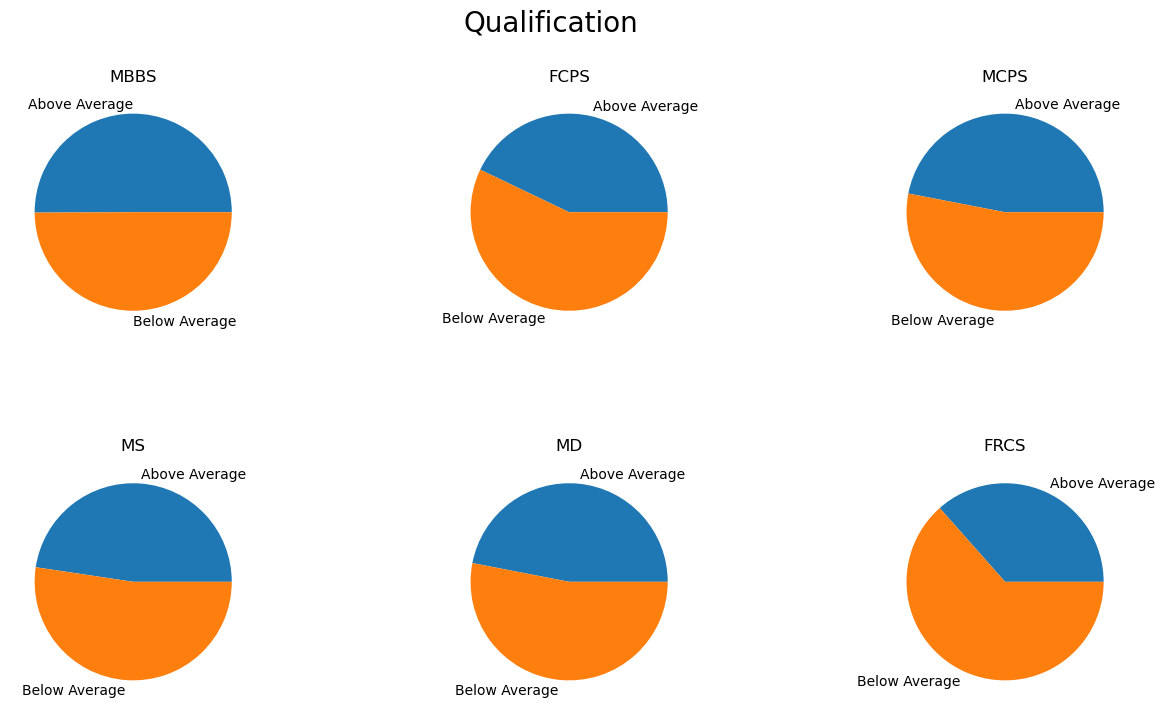

In [296]:
col1 = ['MBBS', 'FCPS', 'MCPS', 'MS', 'MD', 'FRCS']
lab = ['Above Average', 'Below Average']

fig, axes = plt.subplots(figsize=(15, 8))
fig.suptitle('Qualification', fontsize=20)
k = 1

for col in col1:
    arr = []
    for i in range(2):
        x = df[df[col] == i]
        arr.append(np.mean(x['Fee(PKR)']))
    plt.subplot(2, 3, k)
    k += 1
    plt.title(col)
    plt.pie(arr, labels=lab)

# Adjusting space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

### **Insights**
* Most Doctors are paid less than the average Fee
* Qualifications and Degrees don't seem to have any effect on the Fee

In [297]:
df.head()


,City,Specialization,EXP(YRs),#Reviews,Satisfaction Rate,Avg Time to Patients(mins),Wait Time(mins),Doctors Link,Fee(PKR),Hospital Name,MBBS,FCPS,MCPS,MS,MD,FRCS
0,GUJRANWALA,Ent Specialist,6.0,11,100,19,6,1,2000,Central Hospital,1,1,0,0,0,0
1,RAJAN-PUR,General Physician,1.0,0,94,14,11,0,500,No Address Available,1,0,0,0,0,0
2,MIRPUR-KHAS,General Physician,6.0,9,100,10,0,1,1000,Rehman Clinic,1,0,0,0,0,0
3,HYDERABAD,Gynecologist,11.0,71,96,18,10,1,800,Mehmood Hospital,1,1,0,0,0,0
4,LAHORE,Dermatologist,12.0,199,100,16,2,1,1500,Skinnovation,1,1,0,0,0,0


In [298]:
len(df['City'].value_counts())


116

In [299]:
cities = df['City'].value_counts()[0:27]
print(cities)


City
LAHORE            151
KARACHI           151
ISLAMABAD         147
PESHAWAR          134
MULTAN            126
QUETTA            118
FAISALABAD        112
HYDERABAD          94
GUJRANWALA         91
BAHAWALPUR         77
RAHIM-YAR-KHAN     77
ABBOTTABAD         60
SIALKOT            58
SARGODHA           55
GUJRAT             35
OKARA              34
SAHIWAL            31
SWABI              31
MARDAN             30
SWAT               30
KASUR              28
SADIQABAD          26
WAH-CANTT          26
JHELUM             25
SHEIKHUPURA        21
NOWSHERA           21
LARKANA            21
Name: count, dtype: int64


In [300]:
def percentage_according_to_city(city_name):
    df_karachi_c = df['City'] == city_name
    df_karachi = df[df_karachi_c][['Fee(PKR)']]
    df_karachi_binary =  df_karachi['Fee(PKR)'] > threshold
    percentage = df_karachi_binary.sum()/df_karachi_binary.count()
    print(f'percentage of Doctors being paid above average in {city_name}: {round(percentage, 2)}%')
    return percentage

In [301]:
(df['City'] == 'KARACHI').sum()

151

In [302]:
lst = []
for val in df['City'].unique():
    if (df['City'] == val).sum() > 30:
        v = percentage_according_to_city(val)
        print(v)
        lst.append([val, round(v, 2), (df['City'] == val).sum()])

percentage of Doctors being paid above average in GUJRANWALA: 0.41%
0.4065934065934066
percentage of Doctors being paid above average in HYDERABAD: 0.18%
0.18085106382978725
percentage of Doctors being paid above average in LAHORE: 0.78%
0.7814569536423841
percentage of Doctors being paid above average in ISLAMABAD: 0.76%
0.7551020408163265
percentage of Doctors being paid above average in FAISALABAD: 0.38%
0.375
percentage of Doctors being paid above average in OKARA: 0.29%
0.29411764705882354
percentage of Doctors being paid above average in QUETTA: 0.31%
0.3050847457627119
percentage of Doctors being paid above average in KARACHI: 0.61%
0.609271523178808
percentage of Doctors being paid above average in MULTAN: 0.59%
0.5873015873015873
percentage of Doctors being paid above average in SAHIWAL: 0.35%
0.3548387096774194
percentage of Doctors being paid above average in PESHAWAR: 0.54%
0.5373134328358209
percentage of Doctors being paid above average in BAHAWALPUR: 0.21%
0.207792207792

In [303]:
sorted_ratios = sorted(lst, key=lambda item: item[1], reverse=True)


In [304]:
sorted_ratios

[['LAHORE', 0.78, 151],
 ['ISLAMABAD', 0.76, 147],
 ['KARACHI', 0.61, 151],
 ['MULTAN', 0.59, 126],
 ['SIALKOT', 0.55, 58],
 ['PESHAWAR', 0.54, 134],
 ['GUJRAT', 0.43, 35],
 ['GUJRANWALA', 0.41, 91],
 ['FAISALABAD', 0.38, 112],
 ['SAHIWAL', 0.35, 31],
 ['SARGODHA', 0.33, 55],
 ['QUETTA', 0.31, 118],
 ['OKARA', 0.29, 34],
 ['ABBOTTABAD', 0.25, 60],
 ['BAHAWALPUR', 0.21, 77],
 ['HYDERABAD', 0.18, 94],
 ['RAHIM-YAR-KHAN', 0.13, 77],
 ['SWABI', 0.1, 31]]

In [305]:
print('Count\t\tRatio Count')


column_widths = [max(map(len, map(str, col))) for col in zip(*sorted_ratios)]

for row in sorted_ratios:
    for i, elem in enumerate(row):
        print(str(elem).ljust(column_widths[i] + 2), end='')
    print()

Count		Ratio Count
LAHORE          0.78  151  
ISLAMABAD       0.76  147  
KARACHI         0.61  151  
MULTAN          0.59  126  
SIALKOT         0.55  58   
PESHAWAR        0.54  134  
GUJRAT          0.43  35   
GUJRANWALA      0.41  91   
FAISALABAD      0.38  112  
SAHIWAL         0.35  31   
SARGODHA        0.33  55   
QUETTA          0.31  118  
OKARA           0.29  34   
ABBOTTABAD      0.25  60   
BAHAWALPUR      0.21  77   
HYDERABAD       0.18  94   
RAHIM-YAR-KHAN  0.13  77   
SWABI           0.1   31   


## Insights
all cities with rate higher than 50% are listed on Wikipedia's Top 10 (Cities by GDP) list

<img src="wiki.png" width = 75% alt="title">


https://en.wikipedia.org/wiki/List_of_Pakistani_administrative_units_by_gross_state_product

## Hence cities will be ordinally encoded

In [306]:
print(type(df['FCPS'].values))
print(sys.getsizeof(df['FCPS'].values))

<class 'numpy.ndarray'>
112


In [307]:
for column_name in popular_degrees:
    sparse_series = pd.Series(pd.arrays.SparseArray(df[column_name].values))
    df[column_name] = sparse_series

In [308]:
print(type(df['FRCS'].values))
print(sys.getsizeof(df['FRCS'].values))

<class 'pandas.core.arrays.sparse.array.SparseArray'>
56


In [309]:
df.head()

,City,Specialization,EXP(YRs),#Reviews,Satisfaction Rate,Avg Time to Patients(mins),Wait Time(mins),Doctors Link,Fee(PKR),Hospital Name,MBBS,FCPS,MCPS,MS,MD,FRCS
0,GUJRANWALA,Ent Specialist,6.0,11,100,19,6,1,2000,Central Hospital,1,1,0,0,0,0
1,RAJAN-PUR,General Physician,1.0,0,94,14,11,0,500,No Address Available,1,0,0,0,0,0
2,MIRPUR-KHAS,General Physician,6.0,9,100,10,0,1,1000,Rehman Clinic,1,0,0,0,0,0
3,HYDERABAD,Gynecologist,11.0,71,96,18,10,1,800,Mehmood Hospital,1,1,0,0,0,0
4,LAHORE,Dermatologist,12.0,199,100,16,2,1,1500,Skinnovation,1,1,0,0,0,0


In [310]:
specializations = []
for cell in df['Specialization']:
    specs = cell.split(', ')
    for spec in specs:
        specializations.append(spec)

unique_specializations = set(specializations)

In [311]:
print(len(specializations))
print(len(unique_specializations))

2827
61


In [312]:
# del specializations

In [313]:
specs_cols = {spec : [] for spec in unique_specializations }
print(specs_cols)

{'Pulmonologist / Lung Specialist': [], 'Allergy Specialist': [], 'Cosmetic Surgeon': [], 'Pediatrician': [], 'Neuro Surgeon': [], 'Hematologist': [], 'Eye Surgeon': [], 'Lung Surgeon': [], 'Pain Specialist': [], 'Eye Specialist': [], 'Dermatologist': [], 'Chest Respiratory Specialist': [], 'Pathologist': [], 'Pediatric Nephrologist': [], 'General Practitioner': [], 'Cardiologist': [], 'Regenerative Medicine Specialist': [], 'Sexologist': [], 'Gynecologist': [], 'Psychologist': [], 'Neonatologist': [], 'Infectious Diseases': [], 'Spinal Surgeon': [], 'Medical Specialist': [], 'Counselor': [], 'Urologist': [], 'Diabetologist': [], 'Hepatologist': [], 'Aesthetic Physician': [], 'Orthopedic Surgeon': [], 'Pediatric Oncologist and Hematologist': [], 'Neuro Psychiatrist': [], 'General Surgeon': [], 'Gastroenterologist': [], 'Ent Specialist': [], 'Ent Surgeon': [], 'Andrologist': [], 'Internal Medicine Specialist': [], 'Anesthetist': [], 'Rehabilitation Medicine': [], 'Laparoscopic Surgeon':

In [314]:
specs_df = pd.DataFrame(specs_cols)
temp_df = df[['Specialization']]
temp_df.shape

(2351, 1)

In [315]:

for  index in range(temp_df.shape[0]):
    current_spec = temp_df.iloc[index]['Specialization']
    row = []
    for specialization in unique_specializations:
        if current_spec.find(specialization) != -1:
            row.append(1)
        else:
            row.append(0)
    specs_df.loc[len(specs_df)] = row 
specs_df.head()

,Pulmonologist / Lung Specialist,Allergy Specialist,Cosmetic Surgeon,Pediatrician,Neuro Surgeon,Hematologist,Eye Surgeon,Lung Surgeon,Pain Specialist,Eye Specialist,...,Kidney Transplant Specialist,General Physician,Pediatric Orthopedic Surgeon,Family Medicine,Endocrinologist,Pediatric Urologist,Nephrologist,Radiologist,Nutritionist,Rheumatologist
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [316]:
specs_df['Ent Specialist'].head()

0    1
1    0
2    0
3    0
4    0
Name: Ent Specialist, dtype: int64

In [317]:
specs_df['General Physician'].head()

0    0
1    1
2    1
3    0
4    0
Name: General Physician, dtype: int64

In [318]:
df[list(unique_specializations)] = specs_df[list(unique_specializations)]

In [319]:
# del specs_df

In [320]:
for column_name in unique_specializations:
    sparse_series = pd.Series(pd.arrays.SparseArray(df[column_name].values))
    df[column_name] = sparse_series

In [321]:
df.shape

(2351, 77)

In [322]:
df.head(10)

,City,Specialization,EXP(YRs),#Reviews,Satisfaction Rate,Avg Time to Patients(mins),Wait Time(mins),Doctors Link,Fee(PKR),Hospital Name,...,Kidney Transplant Specialist,General Physician,Pediatric Orthopedic Surgeon,Family Medicine,Endocrinologist,Pediatric Urologist,Nephrologist,Radiologist,Nutritionist,Rheumatologist
0,GUJRANWALA,Ent Specialist,6.0,11,100,19,6,1,2000,Central Hospital,...,0,0,0,0,0,0,0,0,0,0
1,RAJAN-PUR,General Physician,1.0,0,94,14,11,0,500,No Address Available,...,0,1,0,0,0,0,0,0,0,0
2,MIRPUR-KHAS,General Physician,6.0,9,100,10,0,1,1000,Rehman Clinic,...,0,1,0,0,0,0,0,0,0,0
3,HYDERABAD,Gynecologist,11.0,71,96,18,10,1,800,Mehmood Hospital,...,0,0,0,0,0,0,0,0,0,0
4,LAHORE,Dermatologist,12.0,199,100,16,2,1,1500,Skinnovation,...,0,0,0,0,0,0,0,0,0,0
5,ISLAMABAD,Urologist,15.0,22,96,15,9,1,2500,Maryam Memorial Hospital,...,0,0,0,0,0,0,0,0,0,0
6,GUJRANWALA,Urologist,10.0,0,94,14,11,0,1000,Gondal Medical Complex Hospital,...,0,0,0,0,0,0,0,0,0,0
7,KHAIRPUR,Urologist,33.0,4,100,14,11,1,1000,No Address Available,...,0,0,0,0,0,0,0,0,0,0
8,NOWSHERA,Urologist,3.0,0,94,14,11,0,1000,No Address Available,...,0,0,0,0,0,0,0,0,0,0
9,JHELUM,General Physician,10.0,0,94,14,11,0,1500,Cmh Hospital,...,0,1,0,0,0,0,0,0,0,0


In [323]:
# df.drop(['Specialization'], axis=1, inplace=True)

In [324]:
train, test = train_test_split(df, train_size=0.8, random_state=21)

train.reset_index(inplace=True)
test.reset_index(inplace=True)
train.drop(['index'], axis=1, inplace=True)
test.drop(['index'], axis=1, inplace=True)

In [325]:
train.head()

,City,Specialization,EXP(YRs),#Reviews,Satisfaction Rate,Avg Time to Patients(mins),Wait Time(mins),Doctors Link,Fee(PKR),Hospital Name,...,Kidney Transplant Specialist,General Physician,Pediatric Orthopedic Surgeon,Family Medicine,Endocrinologist,Pediatric Urologist,Nephrologist,Radiologist,Nutritionist,Rheumatologist
0,SADIQABAD,General Physician,14.0,0,94,14,11,0,800,No Address Available,...,0,1,0,0,0,0,0,0,0,0
1,GUJRAT,Orthopedic Surgeon,8.0,4,100,17,7,1,1500,Doctors Hospital Gujrat,...,0,0,0,0,0,0,0,0,0,0
2,SHEIKHUPURA,General Physician,5.0,1,100,20,9,1,800,District Head Quarter Hospital,...,0,1,0,0,0,0,0,0,0,0
3,ISTANBUL,Orthopedic Surgeon,10.0,0,94,14,11,0,2000,Medistate Kavacik Hospital,...,0,0,0,0,0,0,0,0,0,0
4,PESHAWAR,Orthopedic Surgeon,7.0,25,93,13,12,1,2200,Rehman Medical Institute Hospital,...,0,0,0,0,0,0,0,0,0,0


In [326]:
mean_encoder_c, mean_encoder_s, mean_encoder_h = ce.TargetEncoder(),ce.TargetEncoder(), ce.TargetEncoder()

mean_encoder_c.fit(train[['City']], train['Fee(PKR)'])
train['City'] = mean_encoder_c.transform(train['City'])
test['City'] = mean_encoder_c.transform(test['City'])
    
mean_encoder_s.fit(train['Specialization'], train['Fee(PKR)'])
train['Specialization'] = mean_encoder_s.transform(train['Specialization'])
test['Specialization'] = mean_encoder_s.transform(test['Specialization'])

In [327]:
mean_encoder_c.mapping

{'City': City
  1       820.458589
  2      1201.872147
  3      1185.980585
  4      1376.802345
  5      1408.302984
            ...     
  110    1114.979531
  111    1114.979531
  112    1180.033768
 -1      1206.961170
 -2      1206.961170
 Length: 114, dtype: float64}

In [328]:
train.head()


,City,Specialization,EXP(YRs),#Reviews,Satisfaction Rate,Avg Time to Patients(mins),Wait Time(mins),Doctors Link,Fee(PKR),Hospital Name,...,Kidney Transplant Specialist,General Physician,Pediatric Orthopedic Surgeon,Family Medicine,Endocrinologist,Pediatric Urologist,Nephrologist,Radiologist,Nutritionist,Rheumatologist
0,820.458589,639.571865,14.0,0,94,14,11,0,800,No Address Available,...,0,1,0,0,0,0,0,0,0,0
1,1201.872147,1311.325254,8.0,4,100,17,7,1,1500,Doctors Hospital Gujrat,...,0,0,0,0,0,0,0,0,0,0
2,1185.980585,639.571865,5.0,1,100,20,9,1,800,District Head Quarter Hospital,...,0,1,0,0,0,0,0,0,0,0
3,1376.802345,1311.325254,10.0,0,94,14,11,0,2000,Medistate Kavacik Hospital,...,0,0,0,0,0,0,0,0,0,0
4,1408.302984,1311.325254,7.0,25,93,13,12,1,2200,Rehman Medical Institute Hospital,...,0,0,0,0,0,0,0,0,0,0


In [329]:
indices1, indices2 = [], []
for i in range(train.shape[0]):
    if train['Hospital Name'].iloc[i] == 'No Address Available':
        indices1.append(i)

for i in range(test.shape[0]):
    if test['Hospital Name'].iloc[i] == 'No Address Available':
        indices2.append(i)

mean_encoder_h.fit(train[['Hospital Name']], train['Fee(PKR)'])
train['Hospital Name'] = mean_encoder_h.transform(train['Hospital Name'])
test['Hospital Name'] = mean_encoder_h.transform(test['Hospital Name'])


for index in indices1:
    train['Hospital Name'].iloc[index] = 0

for index in indices2:
    test['Hospital Name'].iloc[index] = 0

In [330]:

included_features = ['City', 'EXP(YRs)', '#Reviews', 'Satisfaction Rate', 'Avg Time to Patients(mins)', 'Wait Time(mins)', 'Doctors Link', 'Hospital Name', 'Specialization']
features = train[included_features]
target = train["Fee(PKR)"]


k_best = SelectKBest(score_func=f_regression, k=6)

X = k_best.fit_transform(features, target)
y = target

selected_features_indices = k_best.get_support(indices=True)

feature_scores = k_best.scores_

feature_info = list(zip(features.columns, feature_scores))

sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")


City: 578.45
Specialization: 548.83
EXP(YRs): 483.13
Hospital Name: 397.46
#Reviews: 228.88
Doctors Link: 176.61
Wait Time(mins): 27.21
Avg Time to Patients(mins): 8.37
Satisfaction Rate: 0.66


In [331]:
selected_features = [*popular_degrees, 'City', 'Specialization', 'EXP(YRs)', 'Hospital Name', '#Reviews', 'Doctors Link' ]
selected_features_df = train[selected_features]
test__ = test[selected_features]
selected_features_df['Fee(PKR)'] = train['Fee(PKR)']
test__['Fee(PKR)'] = test['Fee(PKR)']


In [332]:
selected_features_df.head()


,MBBS,FCPS,MCPS,MS,MD,FRCS,City,Specialization,EXP(YRs),Hospital Name,#Reviews,Doctors Link,Fee(PKR)
0,0,0,0,0,1,0,820.458589,639.571865,14.0,0.000000,0,0,800
1,1,1,0,0,0,0,1201.872147,1311.325254,8.0,1245.088005,4,1,1500
2,1,0,0,0,0,0,1185.980585,639.571865,5.0,1154.012073,1,1,800
3,0,0,0,0,1,0,1376.802345,1311.325254,10.0,1351.631694,0,0,2000
4,1,0,0,0,0,1,1408.302984,1311.325254,7.0,1604.526154,25,1,2200


In [333]:
selected_features_df.shape

(1880, 13)

In [334]:
# Q1 = 750
# Q2 = 1000
# Q3 = 1500

# IQR = Q3 - Q1

# range1 = Q3 + 1.5*IQR
# range2 = Q1 - 1.5*IQR


# condition = (selected_features_df['Fee(PKR)'] < range1) & (selected_features_df['Fee(PKR)'] > range2)  
# selected_features_df = selected_features_df[condition]


In [335]:
selected_features_df.shape

(1880, 13)

In [336]:
selected_features_df.head()

,MBBS,FCPS,MCPS,MS,MD,FRCS,City,Specialization,EXP(YRs),Hospital Name,#Reviews,Doctors Link,Fee(PKR)
0,0,0,0,0,1,0,820.458589,639.571865,14.0,0.000000,0,0,800
1,1,1,0,0,0,0,1201.872147,1311.325254,8.0,1245.088005,4,1,1500
2,1,0,0,0,0,0,1185.980585,639.571865,5.0,1154.012073,1,1,800
3,0,0,0,0,1,0,1376.802345,1311.325254,10.0,1351.631694,0,0,2000
4,1,0,0,0,0,1,1408.302984,1311.325254,7.0,1604.526154,25,1,2200


In [337]:
X_train = selected_features_df.drop(['Fee(PKR)'], axis=1).values
y_train = selected_features_df['Fee(PKR)'].values
X_test = test__.drop(['Fee(PKR)'], axis=1).values
y_test = test__['Fee(PKR)'].values
print(X_train)
RS = RobustScaler()
X_train = RS.fit_transform(X_train)
X_test = RS.transform(X_test)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 ... 1.24508801e+03
  4.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.15401207e+03
  1.00000000e+00 1.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.24508801e+03
  4.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.50530495e+03
  1.96000000e+02 1.00000000e+00]]


In [338]:
# data_with_outliers = selected_features_df.copy()

In [339]:
print(selected_features_df.shape)
# print(data_with_outliers.shape)

(1880, 13)


In [340]:
# for column in selected_features_df.columns:
#     selected_features_df[column] = (selected_features_df[column] - selected_features_df[column].mean()) / selected_features_df[column].std()  


In [341]:
selected_features_df.head()

,MBBS,FCPS,MCPS,MS,MD,FRCS,City,Specialization,EXP(YRs),Hospital Name,#Reviews,Doctors Link,Fee(PKR)
0,0,0,0,0,1,0,820.458589,639.571865,14.0,0.000000,0,0,800
1,1,1,0,0,0,0,1201.872147,1311.325254,8.0,1245.088005,4,1,1500
2,1,0,0,0,0,0,1185.980585,639.571865,5.0,1154.012073,1,1,800
3,0,0,0,0,1,0,1376.802345,1311.325254,10.0,1351.631694,0,0,2000
4,1,0,0,0,0,1,1408.302984,1311.325254,7.0,1604.526154,25,1,2200


In [342]:
df.head()

,City,Specialization,EXP(YRs),#Reviews,Satisfaction Rate,Avg Time to Patients(mins),Wait Time(mins),Doctors Link,Fee(PKR),Hospital Name,...,Kidney Transplant Specialist,General Physician,Pediatric Orthopedic Surgeon,Family Medicine,Endocrinologist,Pediatric Urologist,Nephrologist,Radiologist,Nutritionist,Rheumatologist
0,GUJRANWALA,Ent Specialist,6.0,11,100,19,6,1,2000,Central Hospital,...,0,0,0,0,0,0,0,0,0,0
1,RAJAN-PUR,General Physician,1.0,0,94,14,11,0,500,No Address Available,...,0,1,0,0,0,0,0,0,0,0
2,MIRPUR-KHAS,General Physician,6.0,9,100,10,0,1,1000,Rehman Clinic,...,0,1,0,0,0,0,0,0,0,0
3,HYDERABAD,Gynecologist,11.0,71,96,18,10,1,800,Mehmood Hospital,...,0,0,0,0,0,0,0,0,0,0
4,LAHORE,Dermatologist,12.0,199,100,16,2,1,1500,Skinnovation,...,0,0,0,0,0,0,0,0,0,0


In [343]:
selected_features_df.shape

(1880, 13)

In [344]:
# print(X_.shape)
# print(y_.shape)

In [345]:
selected_features_df.head()

,MBBS,FCPS,MCPS,MS,MD,FRCS,City,Specialization,EXP(YRs),Hospital Name,#Reviews,Doctors Link,Fee(PKR)
0,0,0,0,0,1,0,820.458589,639.571865,14.0,0.000000,0,0,800
1,1,1,0,0,0,0,1201.872147,1311.325254,8.0,1245.088005,4,1,1500
2,1,0,0,0,0,0,1185.980585,639.571865,5.0,1154.012073,1,1,800
3,0,0,0,0,1,0,1376.802345,1311.325254,10.0,1351.631694,0,0,2000
4,1,0,0,0,0,1,1408.302984,1311.325254,7.0,1604.526154,25,1,2200


In [346]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1880, 12)
(471, 12)
(1880,)
(471,)


In [347]:
X_train

array([[-1.        , -1.        ,  0.        , ..., -5.66932519,
        -0.15686275, -1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.32488996,
        -0.07843137,  0.        ],
       [ 0.        , -1.        ,  0.        , ..., -0.11357602,
        -0.1372549 ,  0.        ],
       ...,
       [ 0.        , -1.        ,  0.        , ...,  0.32488996,
        -0.07843137,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -5.66932519,
        -0.15686275, -1.        ],
       [ 0.        , -1.        ,  0.        , ...,  1.57764991,
         3.68627451,  0.        ]])

In [348]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
preds = RFR.predict(X_test)
mse = mean_squared_error(y_test, preds)

In [349]:
sqrt(mse)

637.3671349484222

In [350]:
r2_score(y_test, preds)

0.3957554774539852

In [351]:
preds_train = RFR.predict(X_train)
mse_train = mean_squared_error(y_train, preds_train)
r2_train = r2_score(y_train, preds_train)
print(sqrt(mse_train))
print(r2_train)


135.63902596755938
0.9731886180531191


In [352]:
print(RFR.max_depth)

None


In [353]:
def evaluate_model(model):
    test_preds = model.predict(X_test)
    train_preds = model.predict(X_train)

    test_rmse = sqrt(mean_squared_error(y_true=y_test, y_pred= test_preds))
    train_rmse = sqrt(mean_squared_error(y_true=y_train , y_pred= train_preds))
    test_r2 = r2_score(y_test, test_preds)
    train_r2 = r2_score(y_train, train_preds)
    
    print(f'train rmse: {train_rmse}')
    print(f'train r2 score: {train_r2}')
    print("__________________")
    print("------------------")
    print(f'test rmse: {test_rmse}')
    print(f'test r2 score: {test_r2}')

In [354]:
svm = SVR(kernel='poly', degree=2, C=0.8)
svm.fit(X_train, y_train)
evaluate_model(svm)

train rmse: 831.1772566125039
train r2 score: -0.006786021448686785
__________________
------------------
test rmse: 828.62907498703
test r2 score: -0.02130092696193131


In [355]:
RFR1 = RandomForestRegressor( max_depth= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 50)
RFR1.fit(X_train, y_train)
evaluate_model(RFR1)

train rmse: 264.91183299900075
train r2 score: 0.8977289793876702
__________________
------------------
test rmse: 645.1375297373168
test r2 score: 0.3809325006707389


In [356]:
RFR2 = RandomForestRegressor(random_state=RANDOM_STATE)
RFR2.fit(X_train, y_train)
evaluate_model(RFR2)

train rmse: 141.00569881569257
train r2 score: 0.9710250159770876
__________________
------------------
test rmse: 643.2664747350838
test r2 score: 0.3845181846506248


In [357]:
XG_ = GradientBoostingRegressor()
XG_.fit(X_train, y_train)
evaluate_model(XG_)


train rmse: 284.7995073783299
train r2 score: 0.8817970427045481
__________________
------------------
test rmse: 640.6927453022362
test r2 score: 0.38943345613239877


In [358]:
XG = GradientBoostingRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=1, n_estimators=50, random_state = RANDOM_STATE)
XG.fit(X_train, y_train)
evaluate_model(XG)

train rmse: 247.74297887529417
train r2 score: 0.9105557173735264
__________________
------------------
test rmse: 641.622335136584
test r2 score: 0.3876604121616619


In [359]:
ETR = ExtraTreesRegressor(max_depth=6, min_samples_split=4, min_samples_leaf=4, 
                          n_estimators=100, random_state = RANDOM_STATE, bootstrap=True)

ETR.fit(X_train, y_train)
evaluate_model(ETR)

train rmse: 429.7890887636516
train r2 score: 0.7308089316714921
__________________
------------------
test rmse: 585.9843796579543
test r2 score: 0.48925341763510133


In [360]:
vr = VotingRegressor(
    estimators=[('XG', XG), ('ETR', ETR), ('RFR', RFR2),],
)

vr.fit(X_train, y_train)

evaluate_model(vr)

train rmse: 252.66223051657778
train r2 score: 0.906968392274807
__________________
------------------
test rmse: 611.5930162159078
test r2 score: 0.44363676249585704


In [361]:
ADA = AdaBoostRegressor(estimator=XG , learning_rate=0.01, n_estimators=100, random_state=RANDOM_STATE)

ADA.fit(X_train, y_train)
evaluate_model(ADA)

train rmse: 233.87441504563242
train r2 score: 0.9202895422330386
__________________
------------------
test rmse: 632.1926121897357
test r2 score: 0.40552687844963475


In [362]:
del df
del df_concatenated
del comparison_df
del qualifications_df

In [363]:
import pickle as pkl

pkl.dump(ETR, open("ET_reg.pkl", "wb"))
pkl.dump(RS, open("scaler_reg.pkl", "wb"))
pkl.dump(mean_encoder_c, open("mean_encoder_c_reg.pkl", "wb"))
pkl.dump(mean_encoder_s, open("mean_encoder_s_reg.pkl", "wb"))
pkl.dump(mean_encoder_h, open("mean_encoder_h_reg.pkl", "wb"))